[View in Colaboratory](https://colab.research.google.com/github/saranyamandava/Lambda-School-DataScience/blob/master/Week6_Regression_Assignment_1_.ipynb)

# Regression is Prediction

## Linear Regression

You all know the equation for a line, $y = mx+b$, or in the language of ML $f(x) = mx+b$. Two points are "produced" by $f(x)$:

In [0]:
import matplotlib.pyplot as plt
import numpy as np

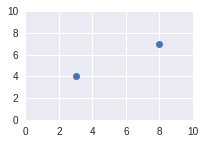

In [0]:
def plot_two():
  x = [3,8]
  y = [4,7]
  plt.figure(figsize=(3,2))
  plt.plot(x,y,'o')
  plt.xlim(0,10)
  plt.ylim(0,10)

plot_two()

It is easy to solve $f(x) = mx+b$ for the above two points. We don't have to! There are many implementations of linear regression in the `python` universe.

In [0]:
x = [3,8]
y = [4,7]
p = np.polyfit(x,y,1)
print (p)

[0.6 2.2]


So, $f(x) = \frac{3}{5}x + 2\frac{1}{5}$

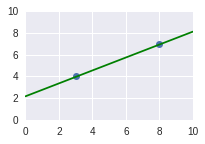

In [0]:
# Really weird - the line drawn in this graph doesn't quite intersect the points
# how I expected. I tweaked the values to make it suit my Mark-One-Eyeball
# better. I suspect that the discrepancy is actually caused by the graph.
def f(x):
  return 0.595*x + 2.16
plot_two()
xs = np.linspace(0,10,11)
plt.plot(xs,f(xs),c='g');

## Co-Linearity

The above two points we used to generate $f(x)$ lie on the same line. Any pair of points lie on the same line - a line is defined by two points. Every other point on the line is co-linear with the first two. If we had three points all defined by $f(x)$, the result of `np.polyfit` would be the same.

What about when the points are not co-linear, but instead are merely covariant?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  


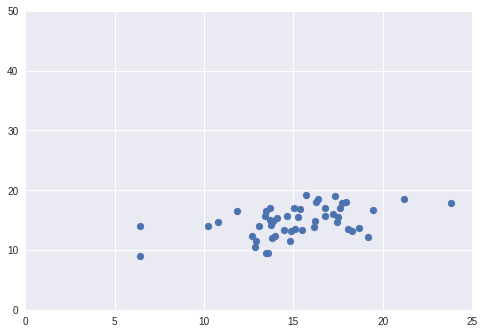

In [0]:
def plot_many(points):
  plt.scatter(*points.T)
  plt.xlim(0,25)
  plt.ylim(0,50)
  
points = np.random.multivariate_normal([15,15],[[12,6],[1,6]],50)
plot_many(points)

In [0]:
x, y = points.T
p2 = np.polyfit(x,y,1)
print(p2)

[0.38442724 8.96567866]


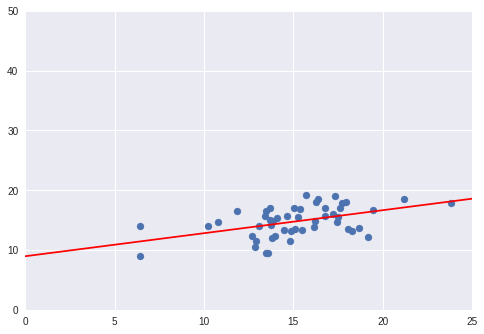

In [0]:
def f2(x):
  return p2[0] * x + p2[1]
plot_many(points)
nx = np.linspace(0,25,26)
plt.plot(nx,f2(nx),c='r');
  

# Regression by Gradient Descent

Linear regression is implemented by a multitude of libraries:

[A bunch of ways](https://medium.freecodecamp.org/data-science-with-python-8-ways-to-do-linear-regression-and-measure-their-speed-b5577d75f8b)

You will never need to implement linear regression by hand, except right now! Linear regression is great because it has an analytic solution to the system of equations $Ax = b$, which can be computed via matrix multiplies:

$x = (A^TA)^{-1}A^Tb$

However, it is also trivial to compute the same solution via gradient descent. Remember those function gradients we studied at the beginning of class?



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """


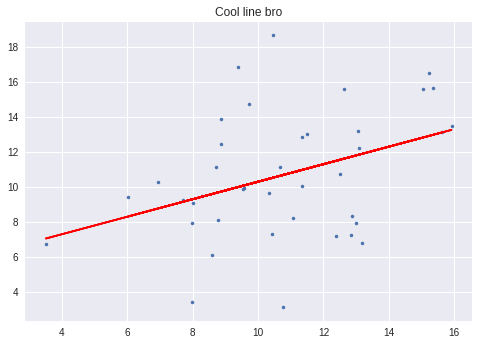

In [0]:
# LAMBDA SCHOOL
# 
# MACHINE LEARNING
#
# MIT LICENSE

import numpy as np
import matplotlib.pyplot as plt

points = np.random.multivariate_normal([10,10],[[10,10],[0,10]],40)
x,y = points.T
solution = np.polyfit(x,y,1)
plt.plot(x,y,marker='.',lineStyle="None");
plt.plot(x,x*solution[0] + solution[1],c='r');
plt.title('Cool line bro');

The solution is just a pair of scalars, $m$ and $b$. What if we pick them at random?

```
# This is formatted as code
```



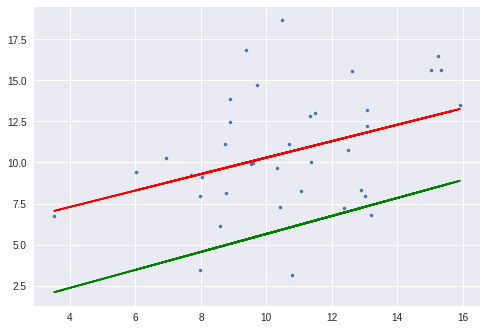

In [0]:
m = np.random.random()
b = np.random.random()

# How is this solution?
plt.plot(x,y,marker='.',lineStyle="None");
plt.plot(x,x*solution[0] + solution[1],c='r');
plt.plot(x,m*x + b,c='g');

## Root-mean Squared Error (RMSE)

RMSE is the most common "loss function", that is, a way of measuring the error in a model prediction. The error of a prediction is the difference between the values it predicted and the values that were expected.

RMSE is calculated:

$RMSE = \sqrt{\frac{\sum_{t=1}^T \left( \hat{y_t} - y_t \right) ^2}{T}}$

$\hat{y_t}$ is the prediction of the model for a particular sample $t$. $y_t$ is the true label for sample $t$.

Linear regression is the proess of minimizing the least-squared error between the line-of-regression and the sample points.

If we calculate `polyfit` as above using `full=True`, it will return the error of the model computed by polyfit.

In [0]:
coefficients, residual, solution_rank, solution_singular_values, rcond_epsilon = np.polyfit(x,y,1,full=True)
print(coefficients)
print(residual)
print(solution_rank)
print(solution_singular_values)
print(rcond_epsilon)

[0.50049621 5.29003006]
[434.46754522]
2
[1.40304743 0.17736381]
8.881784197001252e-15


Of particular interest here is the residual - this number is the MSE of the solution returned by `polyfit`. Can we reproduce it?

What about the residual of the line we just guessed at?

---



In [0]:
confirm_residual = np.sum((x*coefficients[0] + coefficients[1] - y)**2)
print(confirm_residual)

random_residual = np.sum((x*m+b-y)**2)
print(random_residual)

434.46754522407923
1285.8778846164646


### Loss function

The goal of gradient descent is to minimize the loss function - in this case, the loss function being RMSE of our estimated line. Without `polyfit`, we'd try to minimize the loss function all the way to 0, but `polyfit` has already calculated the best possible result! $MSE = 419$, $RMSE = \sqrt{419}$.

## Gradient Descent

`polyfit` determined that the best possible solution for $f(x) = mx+b$ is `coefficients[0] * x + coefficients[1]`. For any other value of `m` and `b`, the error (or RMSE), will be larger. The error function, RMSE is $\sqrt(mx+b-y)^2$

[0.50049621 5.29003006]


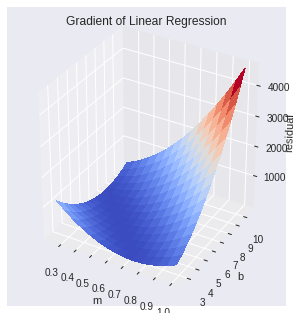

In [0]:
def mse(x,prediction_m,prediction_b,true_m,true_b):
  width = len(prediction_m)
  height = len(prediction_m[0])
  result = np.zeros(width*height).reshape(width,height)
  for row in range(width):
    for col in range(height):
      # calculate the RMSE of prediction_m/b, store in result
      m = prediction_m[row][col]
      b = prediction_b[row][col]
      result[row][col] = np.sum(((x*m+b)-(x*true_m+true_b))**2)
  return result

m_range = np.linspace(coefficients[0]*0.5, 2*coefficients[0], 15)
b_range = np.linspace(coefficients[1]*0.5, 2*coefficients[1], 15)
mm, bb = np.meshgrid(m_range,b_range)
Z = mse(x,mm,bb,coefficients[0],coefficients[1])

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm
import numpy as np

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_surface(mm, bb, Z,  cmap=cm.coolwarm,\
                       linewidth=0, antialiased=False)
ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('residual')
ax.set_title('Gradient of Linear Regression');
print(coefficients)

### Gradient Descent by Partial Derivative

The error function $E_{rms} = \sum{\sqrt{(\hat y_i - y_i)^2}}$ is differentiable: that is, we can find the derivative of the error function, which informs us how to update the parameters to minimize it. A model with zero error is perfect.

One of the foundations of machine learning is taking the partial derivative of the error function. When the error function is well defined like above, the gradient can be computed analytically. When it is not well defined, it can be computed using the method of finite differences which we studied in week 1. Lets drop the $\sqrt{}$ to make the derivative easier:

$E_{rms} = \sum{(\hat y_i - y_i)^2} = \sum{(mx_i + b - y_i)^2}$

We can't drop the $^2$, because that's what makes this a minimization problem.

We have two variables $m$ and $b$ that we'd like to solve for:

$\frac{\partial}{\partial m} = -2\sum x(mx_i + b - y)$

$\frac{\partial}{\partial b} = -2\sum (mx_i + b - y)$

See
* [ML Cheatsheet](http://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html)

and
* [MCCormickML](http://mccormickml.com/2014/03/04/gradient-descent-derivation/)

(0.5007814512657849, 5.286769192830868, 10.861689289405522)


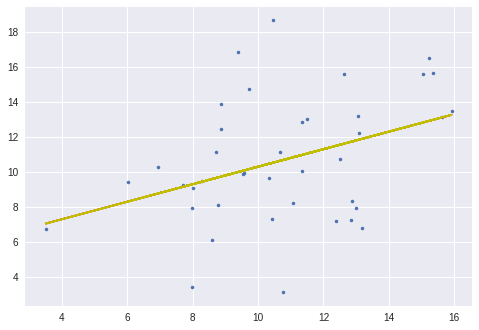

In [0]:
def linear_regression(X, y, m_current=0, b_current=0, epochs=30000, learning_rate=0.002):
   N = float(len(y))
   for i in range(epochs):
        y_current = (m_current * X) + b_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        m_gradient = -(2/N) * sum(X * (y - y_current))
        b_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        b_current = b_current - (learning_rate * b_gradient)
   return m_current, b_current, cost

m_solution = linear_regression(x, y)
print(m_solution)
plt.plot(x,y,'o',marker='.')
plt.plot(x,x*solution[0]+solution[1],c='r')
plt.plot(x,x*m_solution[0]+m_solution[1],c='y')

# Your Assignment

Use gradient descent on the Titanic dataset.

* 1) Load and clean the data
* 1.1) Pay special attention to outliers. How will your model perform with and without outliers?
* 2) Identify which features are scalar values
* 3) Compute the linear regression of these values (there are only two predictable Y values)
* 3.1) Choose a set of features (columns) from Titanic and see which features minimize your RMSE
* 4) Report on your RMSE (residual error) for each of the models that you produce.
Linear regression works well with univariate data (that is, $dim(x) = 1 \times n$ and $dim(y) = 1 \times n$) or with multivariate data: $dim(x)) = m\times n$. Report your best regression selected from the data in the univariate case and the multivarate case. How do they differ?
* 5) Would this RMSE successfully produce good predictions on the Titanic scalar values?

In [0]:
# Complete assignment here.
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
titanic = sns.load_dataset('titanic')

# drop duplicate/analogous columns
titanic = titanic.drop(['alive',
                        'adult_male',
                        'who',
                        'class',
                        'embark_town'], axis=1)

# take care of missing data
titanic['embarked'] = titanic['embarked'].fillna(method='ffill')
titanic = titanic.drop(['deck'], axis=1)
titanic['age'] = titanic['age'].fillna(method='ffill')

# convert binomials and categoricals to encoded labels
for label in ['embarked', 'sex', 'alone']:
    titanic[label] = LabelEncoder().fit_transform(titanic[label])

titanic.head()
print(titanic.shape)


(891, 9)


predicting ages based on fares and let's take age and fare values from the dataset using Regression. 
Let's calculate RMSE on univariate data.

187222.21622112108


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # This is added back by InteractiveShellApp.init_path()


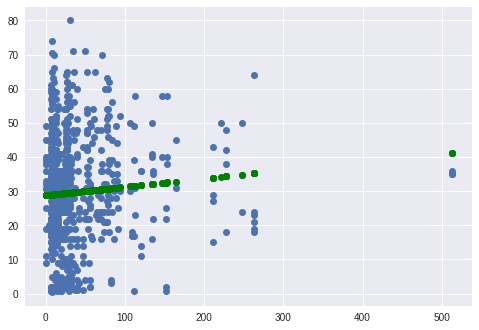

In [0]:
from sklearn import linear_model
ages = titanic['age']
fares = titanic['fare']

regr = linear_model.LinearRegression()
regr.fit(fares.reshape(891,1),ages.reshape(891,1))
predicted_ages = regr.predict(fares.reshape(-1,1))
#print (predicted_ages)
plt.plot(fares,ages,'o')
plt.plot(fares,predicted_ages,'go')
sse = np.sum((predicted_ages-ages.reshape(-1,1))**2)
print (sse)

RMSE on multivariate data.

158313.75136264856


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


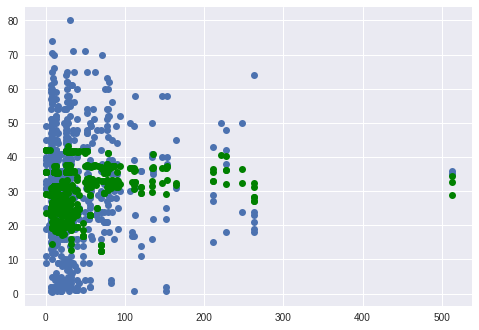

In [0]:
data_ageless = titanic.drop(['age'],axis=1)
regr = linear_model.LinearRegression()
regr.fit(data_ageless,ages.reshape(891,1))
predicted_ages = regr.predict(data_ageless)
#print (predicted_ages)
plt.plot(fares,ages,'o')
plt.plot(fares,predicted_ages,'go')
sse = np.sum((predicted_ages-ages.reshape(-1,1))**2)
print (sse)

## Stretch Goal

Lets get started on Kaggle.

[House Prices Advanced Regression](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

Sign up to compete, and download the dataset! The Zillow data contains a huge number of columns. Spend an hour or two studying the data, cleaning it, and configuring it, then work to use `polyfit` (remember, it is your first ML model) to make predictions about the final column `SalePrice`.


# Thinking about your assignment

1. What am I being asked to do?
2. What coding steps need to be taken to satisfy the problem?
3. What must I do to claim that I have "completed" the assignment?

# Useful Google Terms to solve the above

